# Introduction to Filtering 


* Chapter 6, Signal processing, Matlab: Recipes for earth sciences, Trauth, M. H., Springer, 2010
* Prof. B. G. Osgood, Lecture notes and videos from https://see.stanford.edu/Course/EE261







1. Convolution(), lfilter() and filtfilt() functions
2. Recursive vs. non-recursive filters
3. Impulse response 
4. Frequency response
5. Phase response
6. Butterworth filters (Low pass, bandstop and bandpass)

In [26]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from numpy import arange, sin, pi, angle

In [27]:
#Let's try convolving a random time series

x = np.random.randn(100)        #random series
t=range(0,100,1)                #index
b=(np.ones(3))/3                #weight
y=np.convolve(b,x)

print(len(x))
print(len(y))

100
102


## convolve() introduces (length(b)-1)/2 data points at each end of the series
### Proper clipping necessary

## lfilter() output same length as input but phase shift
### Proper phase correction needed

## filtfilt() provides zero-phase shift, same length as input
### After filtering in forward direction, the filtered sequence is reversed and ran back in reverse direction through the filter
### more processing time

In [28]:
y1=np.zeros(100)    
y1[ :99]=y[3:102]            # clipping and padding with zeros at the end
plt.plot(t,x)
plt.plot(t,y1,label='convolved')

#Comparing with lfilter:  Same length but phase shift

y=lfilter(b,1,x)
y1=np.zeros(100)
y1[ :95]=y[3:98]
plt.plot(t,y1,label='filtered')
plt.legend(loc='upper left')
plt.title('Non-recursive filter')
plt.show()

# Recursive filtering

![image](https://f-origin.hypotheses.org/wp-content/blogs.dir/2484/files/2016/09/Recursive_filter_diffequation_eng.jpg)

In [29]:
plt.plot(t,x)
b=np.array([ 0.0048,0.0193,0.0289,0.0193,0.0048])
a=np.array([1,-2.4,2.3,-1.05,0.1874])
y=lfilter(b,a,x)
y1=np.zeros(100)
y1[ :95]=y[3:98]
plt.plot(t,y1,label='filter')
plt.legend(loc='upper left')
plt.title('Recursive filter')
plt.show()

In [30]:
# Frequency response

f, Pxx = signal.periodogram(x) 
plt.plot(f,Pxx,label='Input')
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');
f, Pyy = signal.periodogram(y1)
plt.plot(f,Pyy,label='Output')
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');
plt.legend(loc='upper left')
plt.title('Frequency response using Recursive filter')
plt.show()

## Here we designed a frequency-selective filter i.e. a filter eliminating certain frequencies








# Impulse response

**A convenient way of describing the characteristics of a filter**

In [6]:
# non-recursive filter using impulse response

x=signal.unit_impulse(21, 10)   # unit impulse
t=range(0,21,1)
plt.stem(t,x,label='signal')

b=np.ones(5)/5       
y=lfilter(b,1,x)
#   No phase correction needed due to unit impulse


baseline=plt.stem(t,y,label='Output')
plt.setp(baseline, color='r', linewidth=2)
plt.legend(loc='upper left')
plt.title('Non-recursive filter (unit impulse)')
plt.show()

## The filter averages the unit impulse over a length of five elements

## Values of output = Filter weights

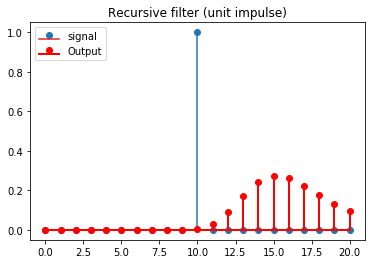

In [7]:
#recursive filter with unit impulse response


x=signal.unit_impulse(21, 10)
t=range(0,21,1)
b=np.array([ 0.0048,0.0193,0.0289,0.0193,0.0048])
a=np.array([1,-2.4,2.3,-1.05,0.1874])
plt.stem(t,x,label='signal')

y=lfilter(b,a,x)
baseline=plt.stem(t,y,label='Output')
plt.setp(baseline, color='r', linewidth=2)
plt.legend(loc='upper left')
plt.title('Recursive filter (unit impulse)')
plt.show()

### Signal is smeared  over broader area and shifted towards right

### Filter not only modifies amplitude but also causes phase shifts

**In some cases, shifts along time axis is important**







# Frequency response

(Effect of a filter on amplitude and phase of a signal)


H(f) ------> Frequency response for a signal

h(f) ------> Impulse response for a signal

such that H(f) is the fourier transform of h(f).

Magnitude response of the filter A(f) = absolute value of complex frequency response H(f)

i.e. A(f)= |H(f)|

Argument of complex frequency response H(f) is phase response of the filter

i.e. phi(f)=arg(H(f))

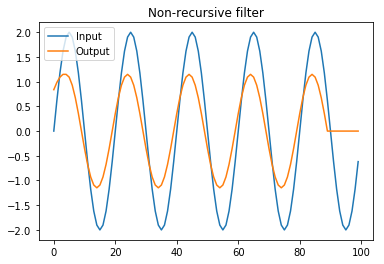

0.42602258957499617

In [55]:
t = arange(0.0, 100.0, 1.0)
x=2*sin(2*pi*t/20)              #Time period=20
plt.plot(t,x,label='Input')

b=np.ones(11)/11
y=lfilter(b,1,x)
y1=np.zeros(100)
y1[ :89]=y[6:95]

plt.plot(t,y1,label='Output')
plt.legend(loc='upper left')
plt.title('Non-recursive filter')
plt.show()

max(y[40:60])
1-max(y1[40:60])/2        #Percent of amplitude reduction

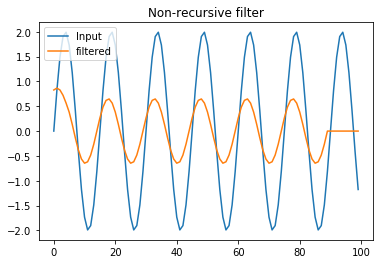

0.67684103264315865

In [66]:
t = arange(0.0, 100.0, 1.0)

x=2*sin(2*pi*t/15)       # T=15
plt.plot(t,x,label='Input')

b=np.ones(11)/11         #filter (size 11)
y=lfilter(b,1,x)
y1=np.zeros(100)
y1[ :89]=y[6:95]

plt.plot(t,y1,label='filtered')
plt.legend(loc='upper left')
plt.title('Non-recursive filter')
plt.show()
max(y1)
1-max(y1[40:60])/2          #Percent of amplitude reduction

## Change of amplitude by 67% but no change in phase

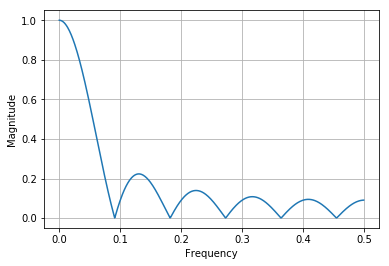

In [11]:
w, h = freqz(b, 1)
f=1*w/(2*pi)
magnitude=abs(h)
plt.plot(f,magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

In [67]:
w, h = freqz(b, 1)
f=1*w/(2*pi)
magnitude=abs(h)
plt.plot(f,1-magnitude)       # percent of magnitude change
plt.xlabel('Frequency')
plt.ylabel('1-Magnitude')
plt.grid(True,which='both')
plt.minorticks_on()

## Frequency response is valuable to predict the effect of filter on a signal...








# Phase response

In [44]:
phase=180*np.angle(h)/pi
plt.plot(f,np.unwrap(phase))
plt.xlabel('Frequency')
plt.ylabel('Phase in degrees')
plt.grid(True,which='both')
plt.minorticks_on()
plt.show()


-90*20/360          # phase shift for T=20


# Since the length of filter is 11, we need to correct the phase by (11-1)/2=5,,,,,,,,,
# So 5-5=0 i.e. zero phase shift

-5.0

In [50]:
t = arange(0.0, 100.0, 1.0)
x=2*sin(2*pi*t/8)
b=np.array([ 0.0048,0.0193,0.0289,0.0193,0.0048])
a=np.array([1,-2.4,2.3,-1.05,0.1874])
y=lfilter(b,a,x)
y1=np.zeros(100)
y1[ :89]=y[6:95]
plt.plot(t,x,t,y1)
plt.title('Recursive filter')
1-max(y1[40:60])/2

0.71769837255686419

0.125

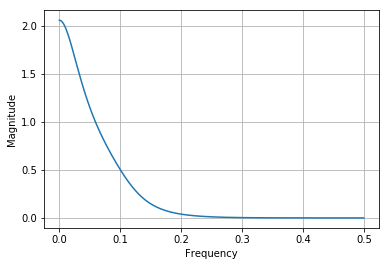

In [14]:
w, h = freqz(b,a)
f=1*w/(2*pi)
magnitude=abs(h)
plt.plot(f,magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
1/8

In [52]:
phase=180*np.angle(h)/pi
plt.plot(f,np.unwrap(phase))
plt.xlabel('Frequency')
plt.ylabel('Phase in degrees')
plt.grid(True)
plt.grid(True,which='both')
plt.minorticks_on()
-220*8/360

-4.888888888888889

## Low-pass and Band-pass filters using butterworth technique


**We aim to design a filter with a synthetic signal with two period 50 and 5: (frequencies 0.02 and 0.20)

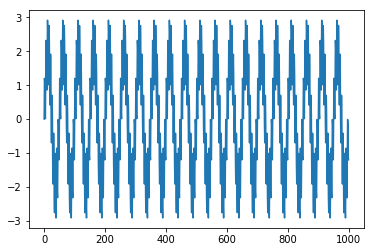

In [16]:
t = arange(0.0, 1000.0, 1.0)
x=2*sin(2*pi*t/50)+sin(2*pi*t/5)
plt.plot(t,x)

Text(0,0.5,'Power')

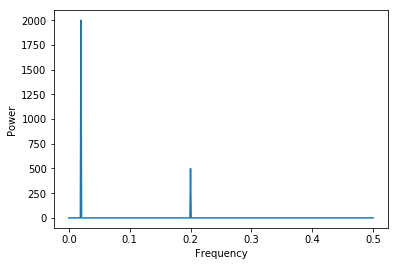

In [17]:
f, Pxx = signal.periodogram(x)
plt.plot(f,Pxx)
plt.xlabel('Frequency')
plt.ylabel('Power')

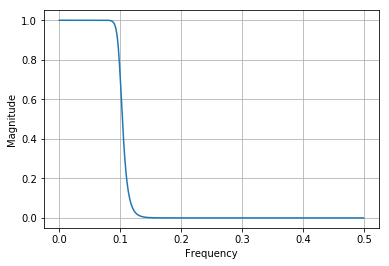

In [18]:
b, a = butter(15,0.1/0.5,'lowpass')  

# 0.1 is the cut-off frequency and 0.5 is the nyquist frequency (which is half of the sampling frequency)

w, h = freqz(b,a)
f=1*w/(2*pi)
magnitude=abs(h)
plt.plot(f,magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

Text(0,0.5,'Power')

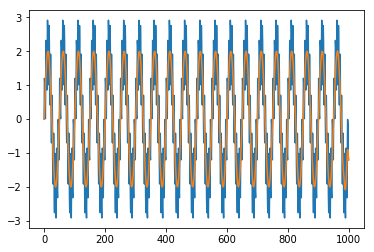

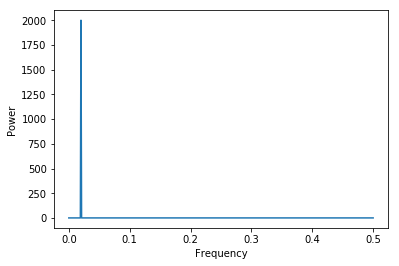

In [19]:
y = signal.filtfilt(b, a, x)
plt.plot(t,x,t,y)
f, Pxx = signal.periodogram(y)
plt.figure()
plt.plot(f,Pxx)
plt.xlabel('Frequency')
plt.ylabel('Power')

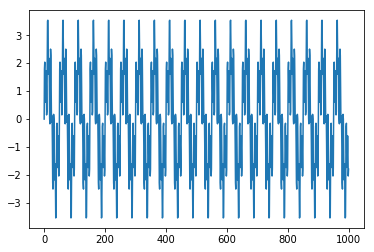

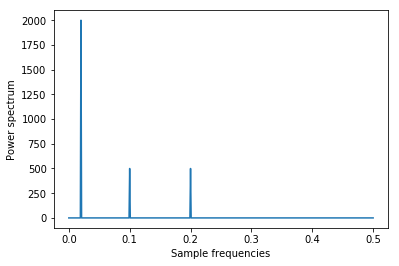

In [62]:
t = arange(0.0, 1000.0, 1.0)
x=2*sin(2*pi*t/50)+sin(2*pi*t/10)+sin(2*pi*t/5)
plt.plot(t,x)
f, Pxx = signal.periodogram(x)
plt.figure()
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');

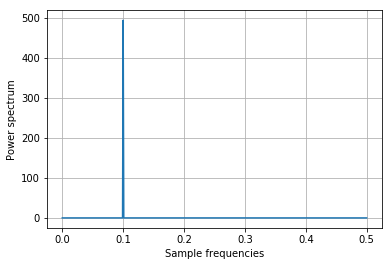

In [63]:
low = 0.05/0.5
high = 0.15/0.5
b, a = butter(5,[low,high],'band') 
xf = signal.filtfilt(b, a, x)
f, Pxx = signal.periodogram(xf) # Daily periodicity
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');
plt.grid(True)

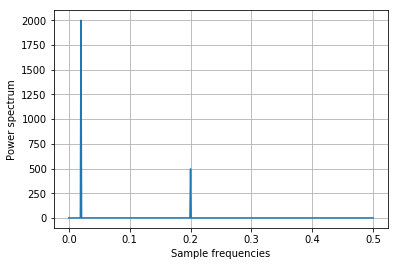

In [64]:
low = 0.05/0.5
high = 0.15/0.5
b, a = butter(5,[low,high],'bandstop') 
xf = signal.filtfilt(b, a, x)
f, Pxx = signal.periodogram(xf) # Daily periodicity
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');
plt.grid(True)